# 7. Basic ML concepts via Linear Regression

We now come back to our initial example where we tried to predict the time it would take a ball to fall from a certain height. Finding the best function to describe data and *predict* new values is called *regression*. There are many types of regression, but the goal is always to predict a continuous value (time) from a set of features (height).


The simplest type of regression is linear regression, i.e. we try to predict a value from a linear combination of features. To understand what it means, let's look at a simple example in the wine dataset. We can take two features and check their relation:

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm

%matplotlib widget

In [2]:
wine = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv', sep=';')

In [3]:
wine.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
%matplotlib widget

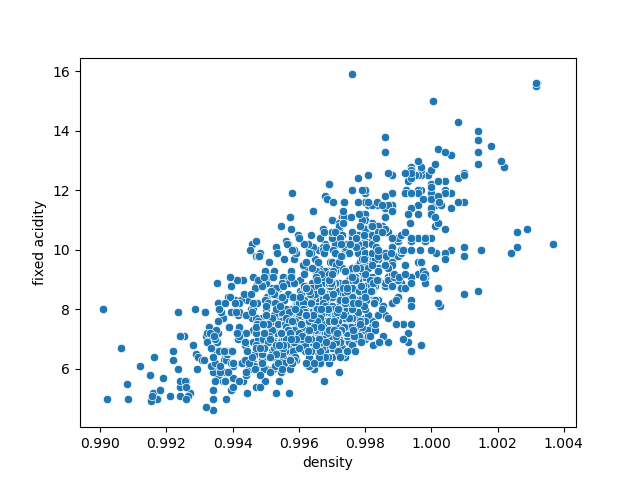

In [5]:
fig, ax = plt.subplots()
sns.scatterplot(data=wine, x='density', y='fixed acidity');

We see that there is a correlation between ```density``` and ```fixed acidity```. We can try to find that actual relation and first assume that: ```fixed acidity``` = $w_0$ + $w_1$*```density```. What we need to do is to find the optimal values fir $w_0$ and $w_1$. This is the simplest linear "combination" that we can do: a fixed values, the bias $w_0$ and a parameter that multiplies the value of one feature.

Let's plot the result for some random choice of parameters e.g. $w_0=-90, w_1=100$:

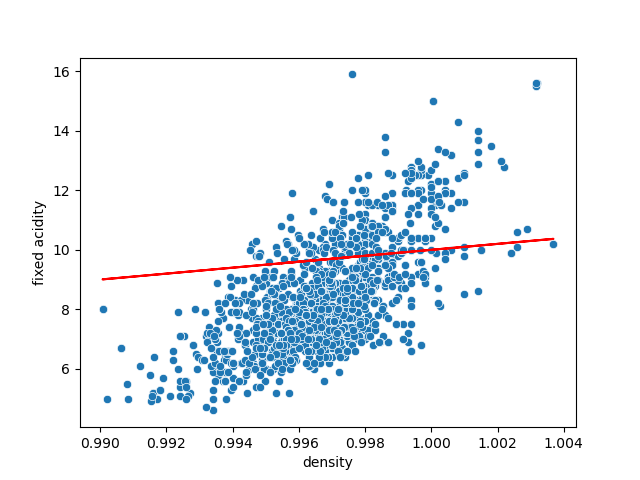

In [6]:
fig, ax = plt.subplots()
sns.scatterplot(data=wine, x='density', y='fixed acidity');
plt.plot(wine['density'], -90 + 100 * wine['density'], 'r');

## Estimating the error

We see that we are quite far away from the correct solution. How can we estimate how far? For each point in our dataset we could now measure its distance to the red line. The goal in the end, is that on average the distance is as small as possible. For this we can simply subtract our actual list of values ```wine['fixed acidity']``` from the model, currently ```-90 + 100 * wine['density']```:

In [7]:
distance_to_model = wine['fixed acidity'] - (-90 + 100 * wine['density'])

Let's plot these distance to have a better idea:

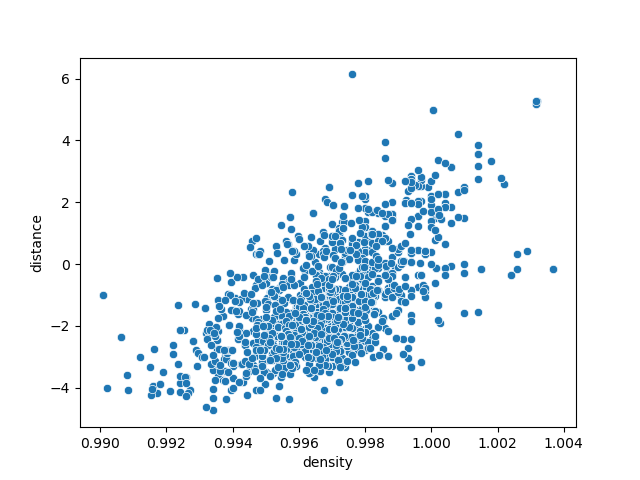

In [8]:
fig, ax = plt.subplots()
ax = sns.scatterplot(x=wine['density'],  y=distance_to_model)
ax.set_ylabel('distance');

We see that we get some negative values on the left when the model predicts higher values than expected and positive when the model is lower than expected on the right. Let's just try to find a slightly better model:

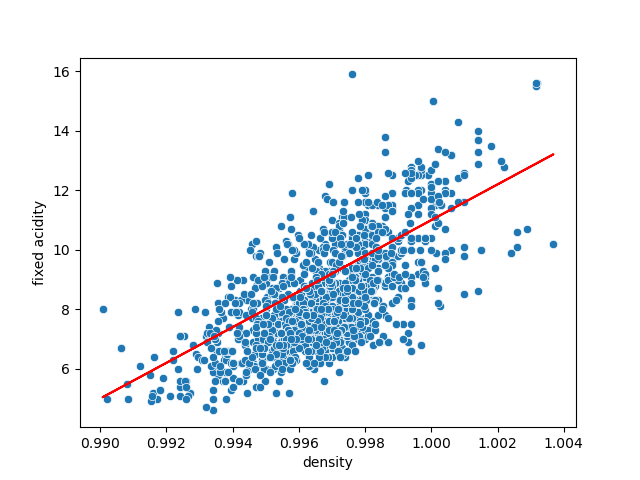

In [9]:
fig, ax = plt.subplots()
sns.scatterplot(data=wine, x='density', y='fixed acidity');
plt.plot(wine['density'], -589 + 600 * wine['density'], 'r');

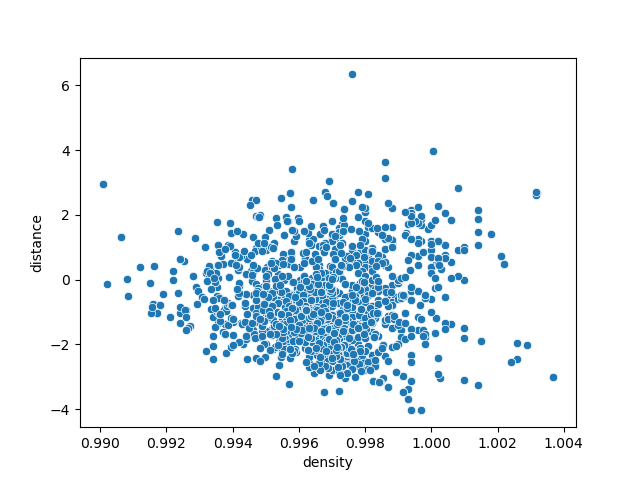

In [10]:
distance_to_model = wine['fixed acidity'] - (-589 + 600 * wine['density'])

fig, ax = plt.subplots()
ax = sns.scatterplot(x=wine['density'],  y=distance_to_model)
ax.set_ylabel('distance');

This looks better now but we need a better way of *quantifying* the quality of the model. We can't just look at such error plots by eye. We could just sum up all values:

In [11]:
total_error = np.sum(distance_to_model)
total_error

-1164.6640000000002

Does this make sense? Let's look at a histogram of our distance values:

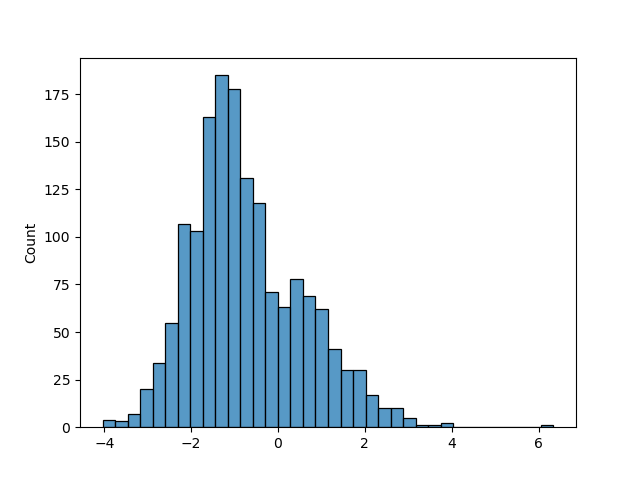

In [12]:
fig, ax = plt.subplots()
sns.histplot(distance_to_model);

If we just take the three largest bins, we should already have a total error of about -1000, so the error seems largely underestimated. The problem is that we are interested in the absolute distance of the model to the data. We don't really care if they are larger or smaller. When we just sum up the distance, the negative and positive errors cancel each other, leading to an underestimation. In the worst case, we would have the same number of points below and above the model and the error would be close to zero. What we need to do is have an actual estimation of the absolute error. We could take the absolute value $abs(x)$, but generally what is done is to just take the square of errors. Now a distance of -3 or +3 always has an error of 9 as $3^2 = -3^2$.

So now we can compute the sum (or mean) of the square of the distances:

In [13]:
square_error = np.sum(distance_to_model**2)
square_error

3532.1135520000007

In [14]:
square_error

3532.1135520000007

## Finding the best solution

There are usually many different ways to find automatically the best values for $w_0$ and $w_1$. In some cases like here there is even an equation that one can solve and find directly those values. In most cases however there is a *search* process: in the introduction we saw that typically we want to find a valley in a plot of the error of our model. Let's look at this plot again for the current problem. First we define a range of possible values for $w_0$ and $w_1$:

In [15]:
w0_range = np.arange(-1000,0, 0.2)
w1_range = np.arange(0, 1000, 0.2)

grid_0, grid_1 = np.meshgrid(w0_range, w1_range)

Now we evaluate our model for specific points in our dataset. Note that as we are fitting a line, we can't consider a single data point as in that case we would have many possible solutions. For example if we look at the first data point in our sample:

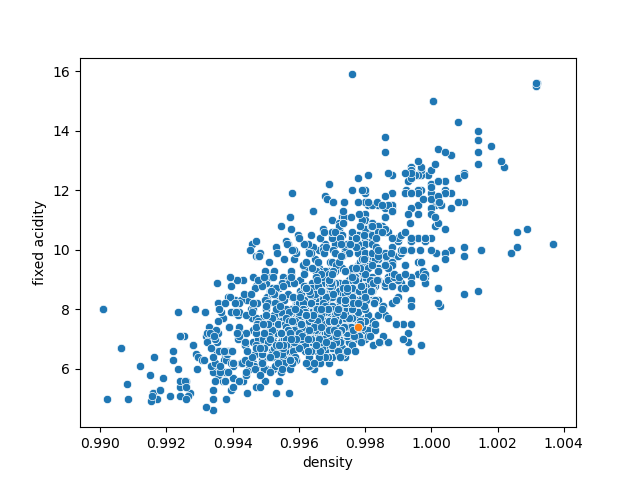

In [16]:
fig, ax = plt.subplots()
sns.scatterplot(data=wine, x='density', y='fixed acidity');
sns.scatterplot(data=wine.iloc[0:1,:], x='density', y='fixed acidity');

We can plot many lines that go through it:

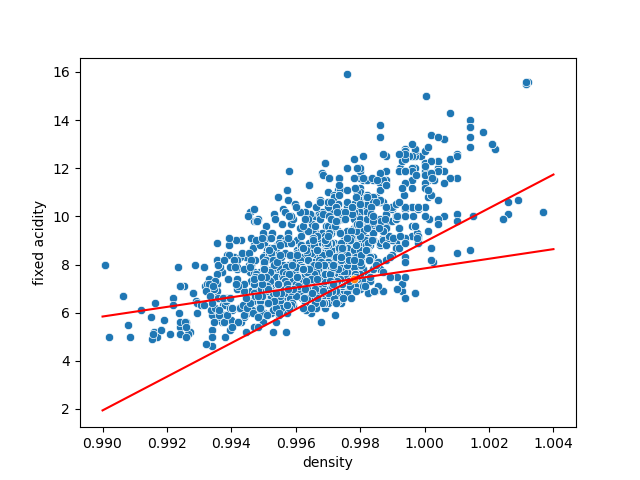

In [17]:
fig, ax = plt.subplots()
sns.scatterplot(data=wine, x='density', y='fixed acidity');
sns.scatterplot(data=wine.iloc[0:1,:], x='density', y='fixed acidity');
plt.plot(np.arange(0.99, 1.004, 0.001),-691.06+np.arange(0.99, 1.004, 0.001)*700, 'r');
plt.plot(np.arange(0.99, 1.004, 0.001),-192.16+np.arange(0.99, 1.004, 0.001)*200, 'r');

Therefore we need at least two points to fix the model. Let's take the 10th point:

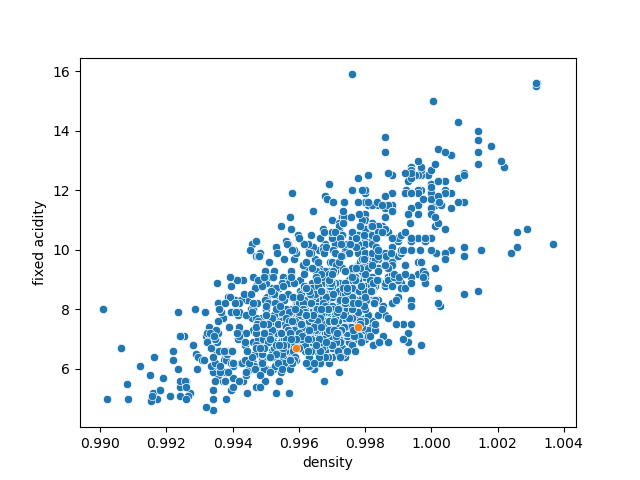

In [18]:
fig, ax = plt.subplots()
sns.scatterplot(data=wine, x='density', y='fixed acidity');
sns.scatterplot(data=wine.iloc[[0,10],:], x='density', y='fixed acidity');

Now we can compute the predicted value of our model for all the points in the grid. We just use the equation ```fixed acidity``` = $w_0$ + $w_1$*```density``` and replace the single values $w_0, w_1$ by our grid values. So for the first and second point we get:

In [19]:
pred1 = grid_0 + grid_1 * wine.density.loc[0]
pred2 = grid_0 + grid_1 * wine.density.loc[10]


```pred1``` and ```pred2``` are now a grids that contain a prediction for each possible value of the parameters. Now we want to compare this to the actual value in our dataset:

In [20]:
wine['fixed acidity'].loc[0]

7.4

In [21]:
wine['fixed acidity'].loc[10]

6.7

We just subtract the prediction and the actual value and take the square:

In [22]:
error1 = (pred1 - wine['fixed acidity'].loc[0])**2
error2 = (pred2 - wine['fixed acidity'].loc[10])**2

We can just sum up the errors as we want to mimimize both of them *together* and plot the result. In this plot the lowest point tells us for which value of $w_0$ and $w_1$ our model is the closest to the data:

In [23]:
total_error = error1 + error2

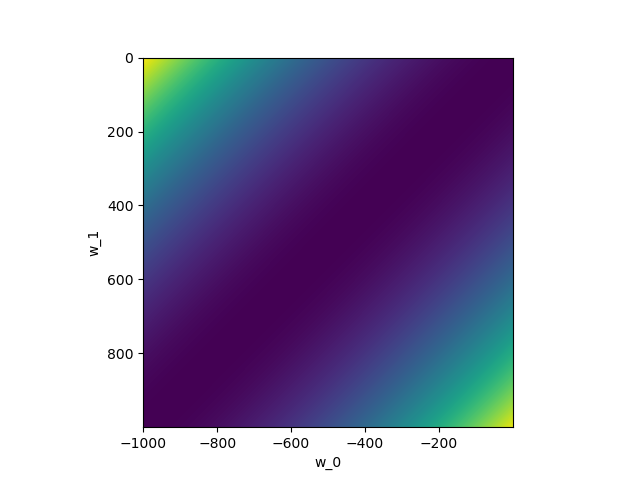

In [24]:
fig, ax = plt.subplots()
ax.imshow(total_error, extent=[w0_range[0],w0_range[-1],w1_range[-1],w1_range[0]])
ax.set_xlabel('w_0')
ax.set_ylabel('w_1');


We can now look for the minimum error in that grid which then gives us the optimal $w_0$ and $w_1$ values:

In [25]:
ind = np.unravel_index(np.argmin(total_error, axis=None), total_error.shape)
ind

(1827, 3214)

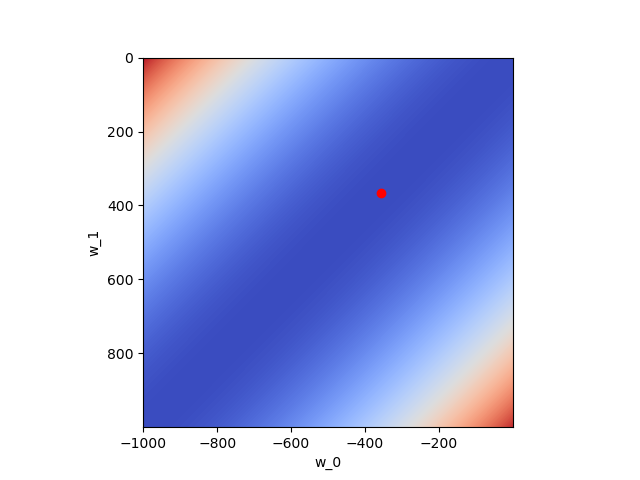

In [26]:
fig, ax = plt.subplots()
ax.imshow(total_error, extent=[w0_range[0],w0_range[-1],w1_range[-1],w1_range[0]],cmap=cm.coolwarm)
ax.plot([grid_0[ind]], [grid_1[ind]], 'ro')
ax.set_xlabel('w_0')
ax.set_ylabel('w_1');

The corresponding values of the parameters are:

In [27]:
grid_0[ind]

-357.19999999985384

In [28]:
grid_1[ind]

365.40000000000003

Let's use those to plot our model:

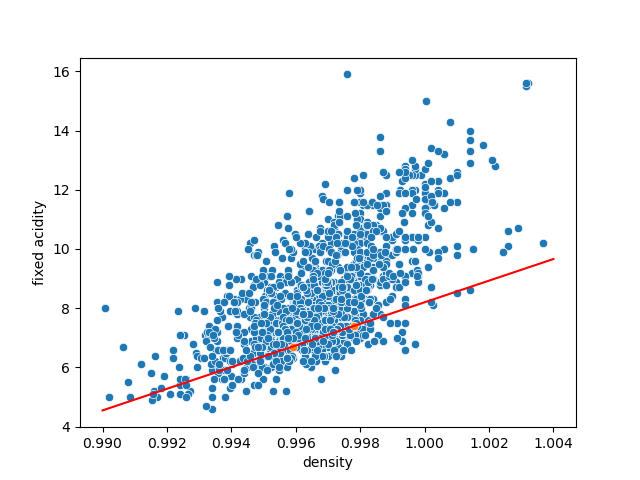

In [29]:
fig, ax = plt.subplots()
sns.scatterplot(data=wine, x='density', y='fixed acidity');
sns.scatterplot(data=wine.iloc[[0,10],:], x='density', y='fixed acidity');
plt.plot(np.arange(0.99, 1.004, 0.001), grid_0[ind]+np.arange(0.99, 1.004, 0.001)*grid_1[ind], 'r');


Of course with just two points, we could have calculated the exact line going through these points. The goal of this step by step demonstration is to show that one can also find an approximate solution by *numerical methods*.

Of course we don't want to compute the optimal parameters for just two points, but for all points. SO now we can compute the error for all points and sum it up:

In [30]:
total_error = 0

for i in wine.index:
    pred = grid_0 + grid_1 * wine.loc[i]['density']
    total_error += (pred - wine.loc[i]['fixed acidity'])**2

Now with this complete error over all data points we can actually find the minimum error point:

In [31]:
ind = np.unravel_index(np.argmin(total_error, axis=None), total_error.shape)

In [32]:
total_error[ind]

2684.584953608291

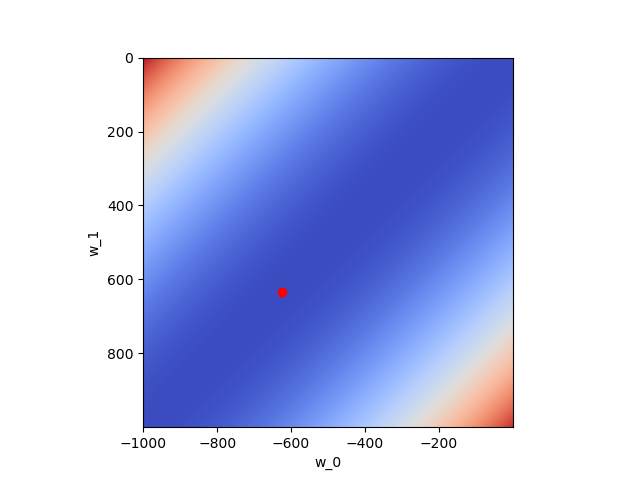

In [33]:
fig, ax = plt.subplots()
ax.imshow(total_error, extent=[w0_range[0],w0_range[-1],w1_range[-1],w1_range[0]],cmap=cm.coolwarm)
ax.plot([grid_0[ind]], [grid_1[ind]], 'ro')
ax.set_xlabel('w_0')
ax.set_ylabel('w_1');

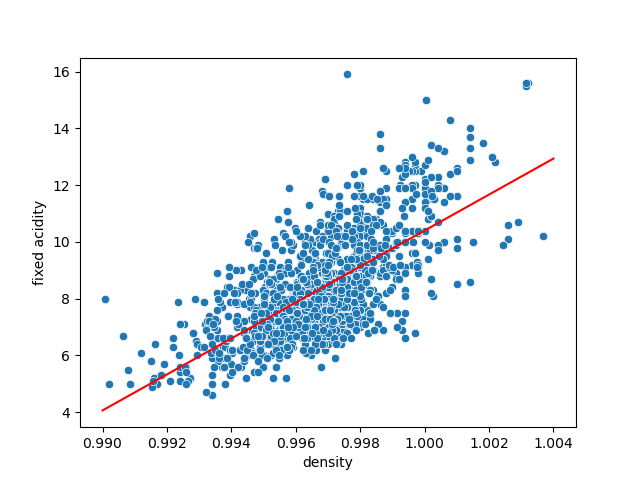

In [34]:
fig, ax = plt.subplots()
sns.scatterplot(data=wine, x='density', y='fixed acidity');
plt.plot(np.arange(0.99, 1.004, 0.001), grid_0[ind]+np.arange(0.99, 1.004, 0.001)*grid_1[ind], 'r');


The corresponding parameters are $w_0$:

In [35]:
grid_0[ind]

-623.1999999999143

And $w_1$:

In [36]:
grid_1[ind]

633.6

## Finding the best solution with scikit-learn

In reality, we don't have to perform all these steps ourselves, we can use algorithm that have been implemented and optimized in libraries like scikit-learn. The simplest such algorithm is just called ```LinearRegression``` and is available in the submodule ```linear_model```:

In [37]:
from sklearn import linear_model

A large part of the algorithms implemented in scikit-learn in a similar way:

1. Create arrays containing the independent and dependent variables
2. Instantiate a chosen model, e.g. LinearRegression with some optional parameters specific to the method
3. "Train" the model, i.e. find optimal parameters, on your dataset
4. Use the trained model for predictions

In our current example, first the independent variable is just the ```density``` column:

In [38]:
X = wine.density.values
X.shape

(1599,)

Note that we here only considered a single variable, but we could try to predict the ```fixed acidity``` using more than just the ```density```. We could in addition have used the ```alcohol``` as well using an additional parameter: ```fixed acidity``` $w_0$ + $w_1$ * ```density``` + $w_2$ * ```alcohol```. Therefore scikit-learn usually expects to be two dimensional, each column containing one feature such as ```density``` and ```alcohol```. Here we therefore have to add an "empty" dimension to make our single features 2D-like:

In [39]:
X = X[:, np.newaxis]
X.shape

(1599, 1)

The variable that we want to precit can be a single vector, therefore we can just say:

In [40]:
y = wine['fixed acidity']

Now we instantiate our model:

In [41]:
model = linear_model.LinearRegression()

Finally, we call the ```fit``` method using our *training data* ```X``` and ```y```:

In [42]:
res = model.fit(X=X, y=y)

The ```res``` object contains all the information about our fit. In particular it contains the values of the parameters in ```coef_```:

In [43]:
res.coef_

array([616.28450984])

Here we only have one parameter because the first term ```w_0``` is the intercept and stored in a separate place:

In [44]:
res.intercept_

-605.9599013339031

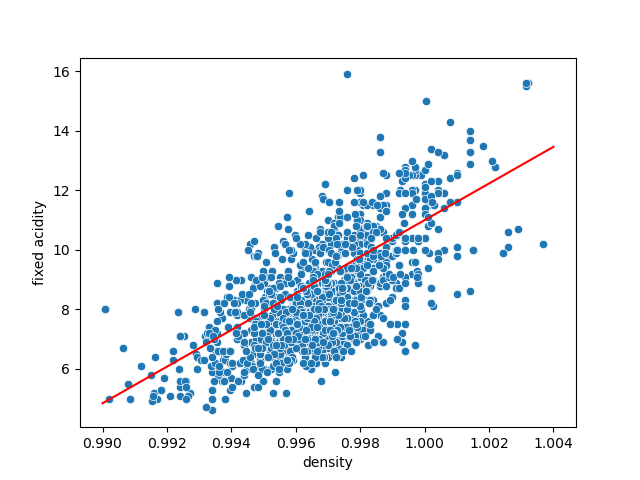

In [45]:
fig, ax = plt.subplots()
sns.scatterplot(data=wine, x='density', y='fixed acidity');
plt.plot(np.arange(0.99, 1.004, 0.001), -605+np.arange(0.99, 1.004, 0.001)*616, 'r');

We see that the values that we get are close to our approximation above. It we were using a finer grid for our approximation we would end up with the same values.

## Gradient descent

Note that to solve the above regression problem, the ```LinearRegression``` doesn't compute a grid as we have done. It rather solves an equation to find the solution. If the dataset is large or the model has a many features to consider, solving this equation becomes slow and one has to resort to a numerical method.

In reality, one never computes the sort of grid that we have computed above, as this would be computationally very intensive and ineffective. One of the main ways to *search* for the "lowest point in the valley" is to use only local information. The plot of errors that we have shown above can be represented as a surface where larger errors are mountains and small errors valleys. We can now choose a random starting point indicated with a red dot below:

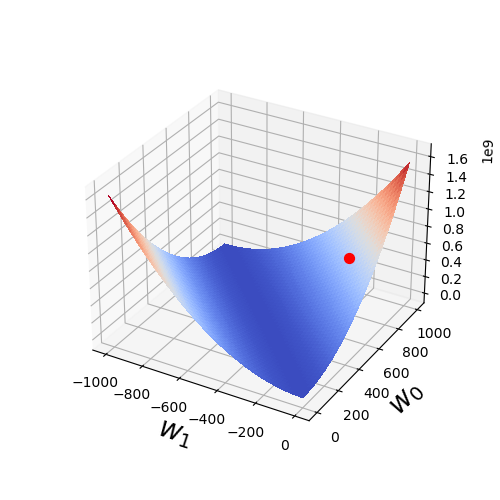

In [46]:
fig = plt.figure(figsize=(5,5))

X = grid_0.copy()
Y = grid_1.copy()
Z = total_error.copy()

ax = fig.add_subplot(1, 1, 1, projection='3d',computed_zorder=False)

# Plot the surface.
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)#, vmax=5)

ax.scatter(
    [grid_0[4000, 4000]],
    [grid_1[4000, 4000]],
    [total_error[4000, 4000]], c='red', s=50
)

ax.set_xlabel('$w_1$', fontdict={'fontsize':20})
ax.set_ylabel('$w_0$', fontdict={'fontsize':20});

How do we now reach the bottom of the valley from this point? It's also important to remember that we don't *see* the whole surface. It's as if we were on a snowy mountain in the fog: we see a few meters from our current position and the only information we have is the direction of the slope.

To simplify things, let's just look at a 1d example where our error as a function of a single parameter $w_0$ looks like a parabola. Here again we want to find the bottom of the valley. Let's also start from a random point (red), here chosen as $w_0 = 7.5$:

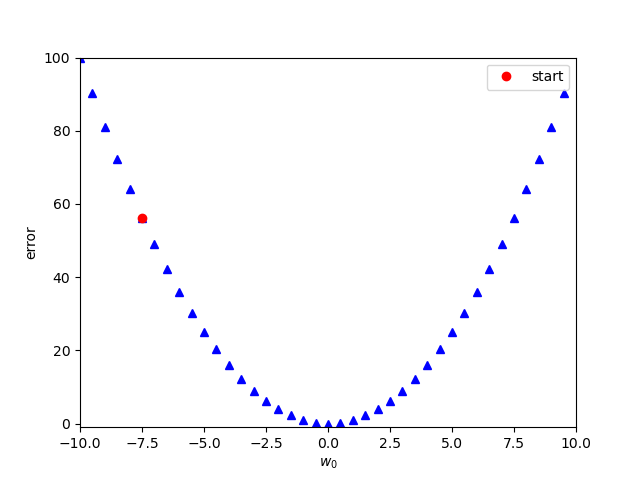

In [47]:
def parabola(x):
    return x**2

w0_range = np.arange(-10, 10, 0.5)
error = parabola(np.arange(-10, 10, 0.5))

fig, ax = plt.subplots()
ax.plot(w0_range, error,'b^')
ax.plot([-7.5], [parabola(-7.5)], 'ro', label='start');
ax.set(xlim=[-10,10], ylim=[-1,100], xlabel='$w_0$', ylabel='error')
ax.legend();

We can now slide along the slope until we find the bottom. Again remember that we don't "see" the whole curve, and therefore at this moment we only see our current position:

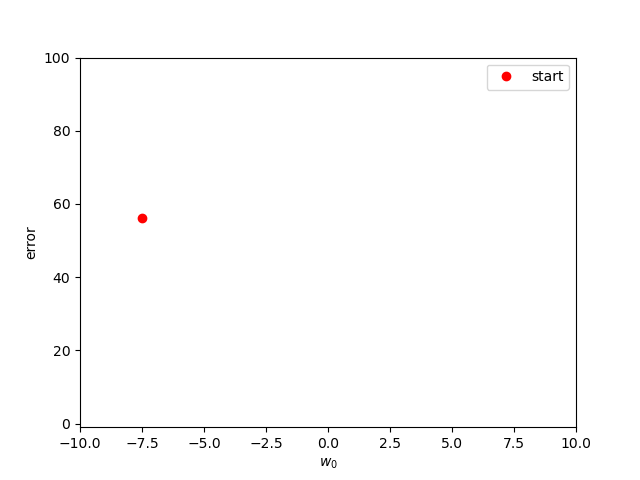

In [48]:
w0_range = np.arange(-7.5, -7.5, 0.5)
error = parabola(w0_range)

fig, ax = plt.subplots()
ax.plot(w0_range, error, 'b^')
ax.plot([-7.5], [parabola(-7.5)], 'ro', label='start');
ax.set(xlim=[-10,10], ylim=[-1,100], xlabel='$w_0$', ylabel='error')
ax.legend();

What we can do is slightly vary the value of our current choice of $w_0$ and estimate the error. This would give us the following information. Let's create two points around $w_0=-7.5$

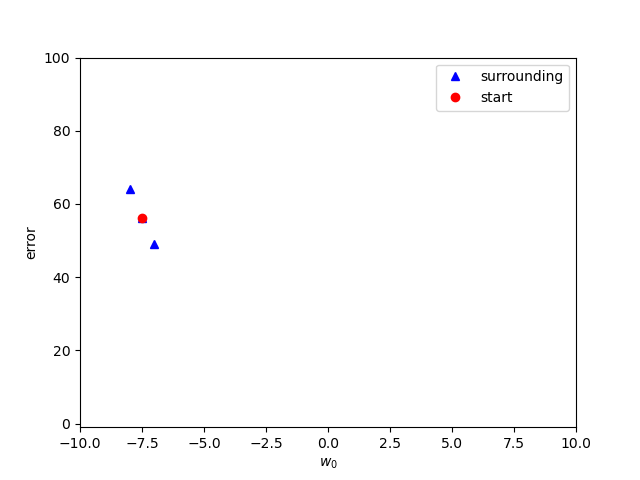

In [49]:
w0_range = np.arange(-8, -6.5, 0.5)
error = parabola(np.arange(-8, -6.5, 0.5))

fig, ax = plt.subplots()
ax.plot(w0_range, error, 'b^', label='surrounding')
ax.plot([-7.5], [parabola(-7.5)], 'ro', label='start');
ax.set(xlim=[-10,10], ylim=[-1,100], xlabel='$w_0$', ylabel='error')
ax.legend();

We now have our current point, plus some information on the local surroundings. In particular we see now in which direction we should go to decrease the error: to the right, i.e. larger values of $w_0$.

If we want to follow the slope, we can just estimate it by drawing a line between the close-by points: 

In [50]:
slope = (error[-1]-error[0]) / (w0_range[-1]-w0_range[0])
slope

-15.0

With this we know that if we move to the right, i.e. use **larger $w_0$ values**, since the **slope is negative**, the **error will decrease**. If at some point the slope becomes positive, it means that we have to move to the left, i.e. make $w_0$ smaller. So we can use the slope to update the value of $w_0$. We can say that $w_0^{new} = w_0 - lr * slope$ with ```lr``` some multiplicative factor e.g. 0.1. Therefore:

In [51]:
w_0_new = -7.5 - slope * 0.1

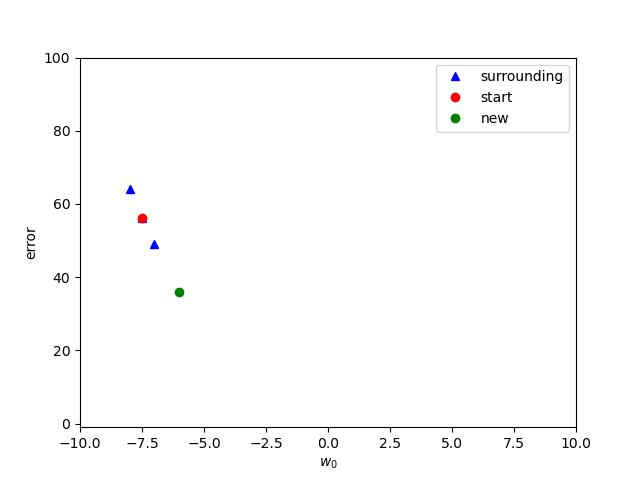

In [52]:
w0_range = np.arange(-8, -6.5, 0.5)
error = parabola(np.arange(-8, -6.5, 0.5))

fig, ax = plt.subplots()
ax.plot(w0_range, error, 'b^', label='surrounding')
ax.plot([-7.5], [parabola(-7.5)], 'ro', label='start');
ax.plot([w_0_new], [parabola(w_0_new)], 'go', label='new');
ax.set(xlim=[-10,10], ylim=[-1,100], xlabel='$w_0$', ylabel='error')
ax.legend();

We have moved in the right direction! Now we can repeat the operation. Compute surrounding points, the local slope and update the value of $w_0$:

/var/folders/mk/632_7fgs4v374qc935pvf9v00000gn/T/ipykernel_6199/2437442382.py:7: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


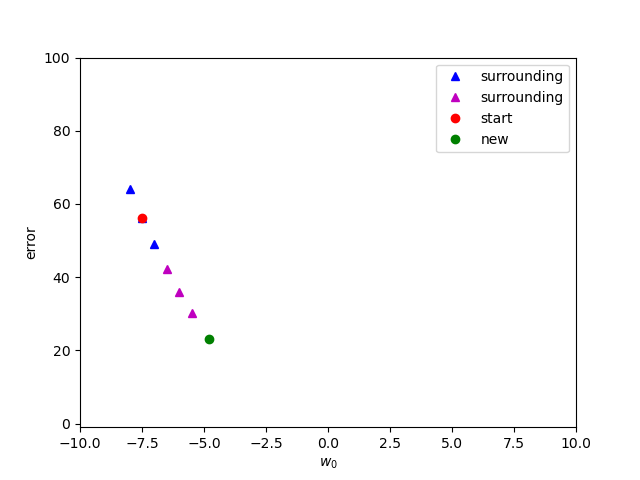

In [53]:
w0_range2 = np.arange(w_0_new-0.5, w_0_new+0.6, 0.5)
error2 = parabola(w0_range2)
slope = (error2[-1]-error2[0]) / (w0_range2[-1]-w0_range2[0])

w_0_new = w_0_new - slope * 0.1

fig, ax = plt.subplots()
ax.plot(w0_range, error, 'b^', label='surrounding')
ax.plot(w0_range2, error2, 'm^', label='surrounding')
ax.plot([-7.5], [parabola(-7.5)], 'ro', label='start');
ax.plot([w_0_new], [parabola(w_0_new)], 'go', label='new');
ax.set(xlim=[-10,10], ylim=[-1,100], xlabel='$w_0$', ylabel='error')
ax.legend();

We can repeat now the operation until we reach the bottom of the valley. Notice that when we reach to bottom, the slope should be close to zero and therefore we should stop moving automatically! We can plot the entire series of updated values for $w_0$:

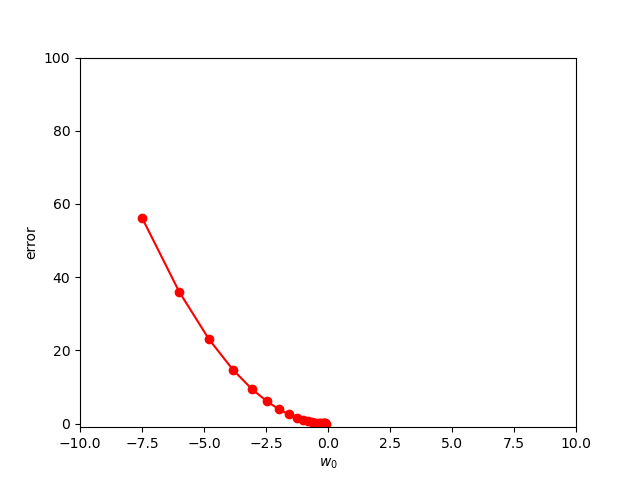

In [54]:
fig, ax = plt.subplots()
w_0_vals = [-7.5]
error_vals = [parabola(w_0_vals[0])]
for i in range(20):
    
    w0_range = np.arange(w_0_vals[-1]-0.5, w_0_vals[-1]+0.6, 0.5)
    error = parabola(w0_range)
    slope = (error[-1]-error[0]) / (w0_range[-1]-w0_range[0])

    w_0_new = w_0_vals[-1] - slope * 0.1
    w_0_vals.append(w_0_new)
    error_vals.append(parabola(w_0_new))

ax.plot(w_0_vals, error_vals, 'ro-');

ax.set(xlim=[-10,10], ylim=[-1,100], xlabel='$w_0$', ylabel='error');

We clearly reach the bottom and we also clearly see that when the slope decreases, the steps we take keep getting smaller.

This type of method where we use the local slop to search for the minimum is called **gradient descent**. The gradient is a general term for slope in the case where we deal with more than one variable (like in the surface shown previously) and descent means going down. There are many ways to computer the slope, update the parameters etc. and we won't go into such details. The important idea here is that we use the local slope information to reach a global minimum. Most of the time you will hear about Stochastic Gradient Descent (SGD) which uses this approach but where only a fraction of the data are used at each iteration. This is particularly relevant when using very large amounts of data.

## Gradient descent in scikit-learn

This type of approaches using the gradient (slope) is also available out of the box in scikit-learn with the SGDRegressor. We use it almost in the same way as the plain linear regression method. First we instantiate the model and then fit with the training data:

In [55]:
model = linear_model.SGDRegressor()

X = wine.density.values
X = X[:, np.newaxis]
y = wine['fixed acidity']

res = model.fit(X=X, y=y, coef_init=600, intercept_init=-600)

In [56]:
res.coef_

array([604.67507941])

In [57]:
res.intercept_

array([-594.43049117])

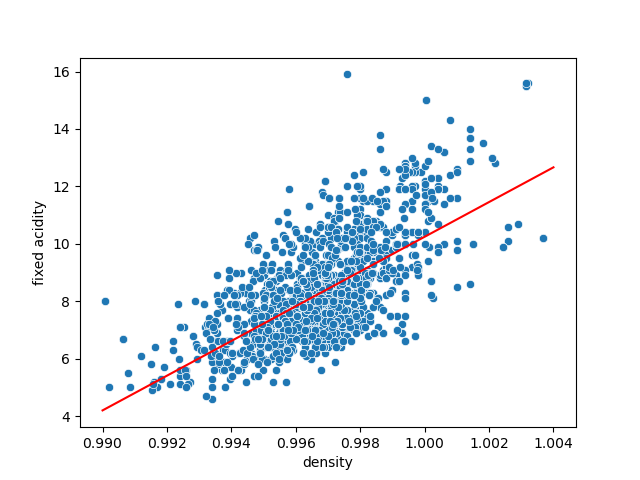

In [58]:
fig, ax = plt.subplots()
sns.scatterplot(data=wine, x='density', y='fixed acidity');
plt.plot(np.arange(0.99, 1.004, 0.001), res.intercept_ + np.arange(0.99, 1.004, 0.001)*res.coef_[0], 'r');

## Potential problems

When using any type of Machine Learning algorithm, one has to know about its limitations and typical pitfalls. Some of them are common to many algorithms and some are method specific.

### Initial conditions

When we executed the fit with the standard linear regression, we could just use ```res = model.fit(X=X, y=y)``` but when we used the gradient descent method above, we had to use
```res = model.fit(X=X, y=y, coef_init=600, intercept_init=-600)```, i.e. we had to manually specify a starting point with ```coef_init``` and ```intercept_init```. This is because unlike the standard method, gradient descent actually *searches* for a solution, and if we start too far away, we might never find it. Let's try without:

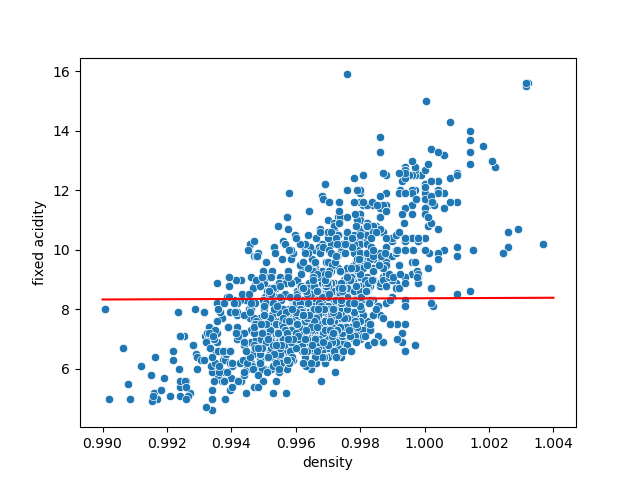

In [59]:
res = model.fit(X=X, y=y)

fig, ax = plt.subplots()
sns.scatterplot(data=wine, x='density', y='fixed acidity');
plt.plot(np.arange(0.99, 1.004, 0.001), res.intercept_ + np.arange(0.99, 1.004, 0.001)*res.coef_[0], 'r');

Clearly gradient descent didn't find the correct solution. There are mainly two reasons that could explain this: we didn't do enough steps or the algorithm found another "not too bad" solution and couldn't escape it.

We can try to adjust the number of iterations:

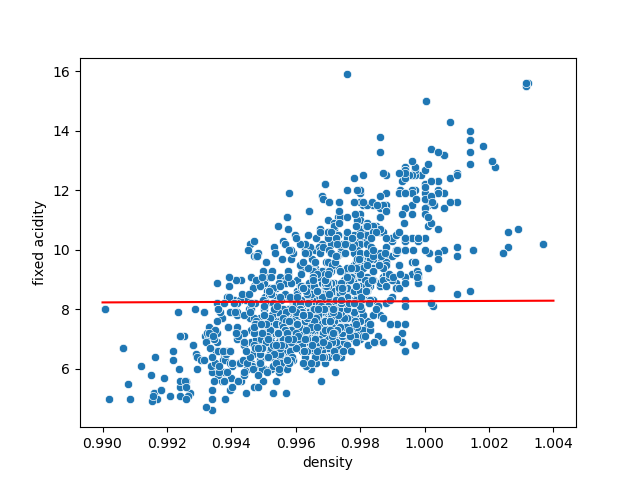

In [60]:
model = linear_model.SGDRegressor(max_iter=10000)

fig, ax = plt.subplots()
res = model.fit(X=X, y=y)
sns.scatterplot(data=wine, x='density', y='fixed acidity');
plt.plot(np.arange(0.99, 1.004, 0.001), res.intercept_ + np.arange(0.99, 1.004, 0.001)*res.coef_[0], 'r');

It doesn't seem to do much to solve our problem, so we are probably trapped in some local minimum. To understand this, let's imagine that our 1D erro plot looks like this:

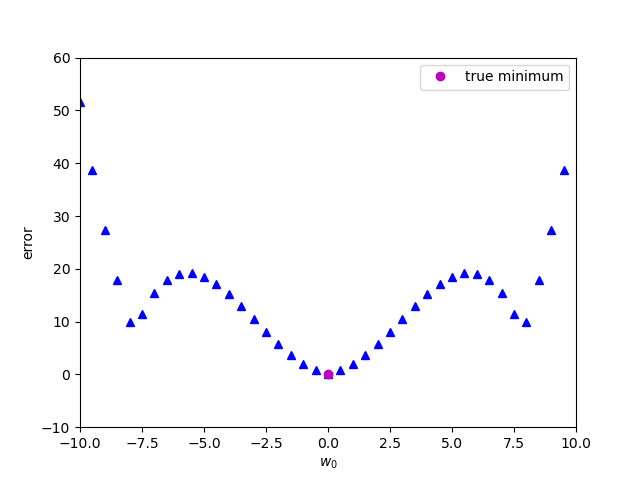

In [61]:
w0_range = np.arange(-10, 10, 0.5)
def error_fun(x):
    return x**2 * np.abs(np.cos(4*x/20)) + np.abs(x)/1
error = error_fun(w0_range)

fig, ax = plt.subplots()
ax.plot(w0_range, error, 'b^')
ax.plot([0], error_fun(np.array([0])), 'mo', label='true minimum');
#ax.plot([w_0_new], [parabola(w_0_new)], 'go', label='new');
ax.set(xlim=[-10,10], ylim=[-10,60], xlabel='$w_0$', ylabel='error')
ax.legend();

If we start our search too for on the left or the right and follow the slope, we will end up in one of the local minima. For example, if we start at $w_0 = -6$ we will end up in the local minimum on the left:

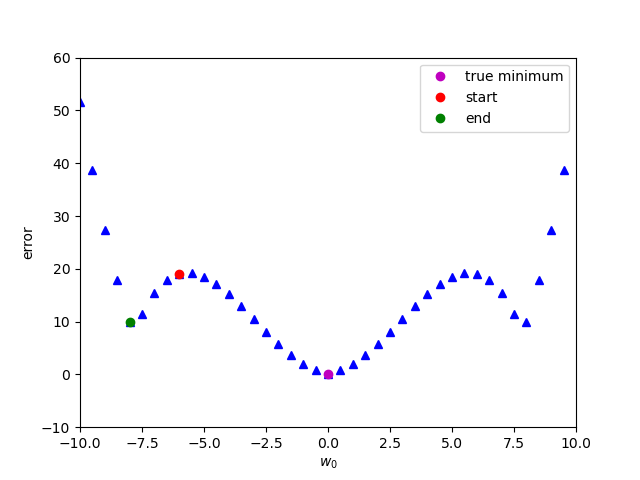

In [62]:
fig, ax = plt.subplots()
ax.plot(w0_range, error, 'b^')
ax.plot([0], [0], 'mo', label='true minimum');
ax.plot([-6], [error_fun(-6)], 'ro', label='start');
ax.plot([-8], [error_fun(-8)], 'go', label='end');
ax.set(xlim=[-10,10], ylim=[-10,60], xlabel='$w_0$', ylabel='error')
ax.legend();

So in this case we would have to specify an initial conditions e.g. $w_0=-5$. Note that there are alternatives to take care of this. For example one can run the optimization several times from different initial points and keep the *lowest* minium, or one can add some noise at each step to help the optimizer get over small "hills".

### Flat gradient

As we use the gradient to reach the minimum, if the error curve is flat *somewhere else* than at the true minimum, it can start to wander randomly as there is no slope anymore to follow. This would be the case for example with an error like this: 

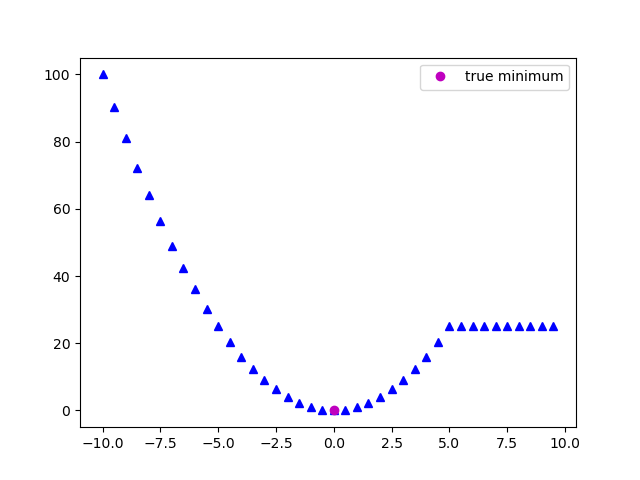

In [63]:
w0_range = np.arange(-10, 10, 0.5)
def error_fun(x):
    out = x**2
    out[x > 5]=25
    return out
error = error_fun(w0_range)

fig, ax = plt.subplots()
ax.plot(w0_range, error, 'b^')
ax.plot([0], error_fun(np.array([0])), 'mo', label='true minimum');
#ax.plot([w_0_new], [parabola(w_0_new)], 'go', label='new');
#ax.set(xlim=[-10,10], ylim=[-10,20], xlabel='$w_0$', ylabel='error')
ax.legend();

If we start here around $w_0=7.5$ for example, the slope is zero and therefore the step to compute the new parameter value $w_0^{new} = w_0 - lr * slope$ is zero: we don't converge to the solution.

### Over-shooting solution

The *learning rate* parameter we have in $w_0^{new} = w_0 - lr * slope$ is very important in that it dictates how big we want the step to be. If it is too small, then it will take for ever to find the solution. If it is too large, there's a risk that we miss the solution because we move too fast. For example if we use again our loop above but use a larger learning rate, then sequence of steps is:

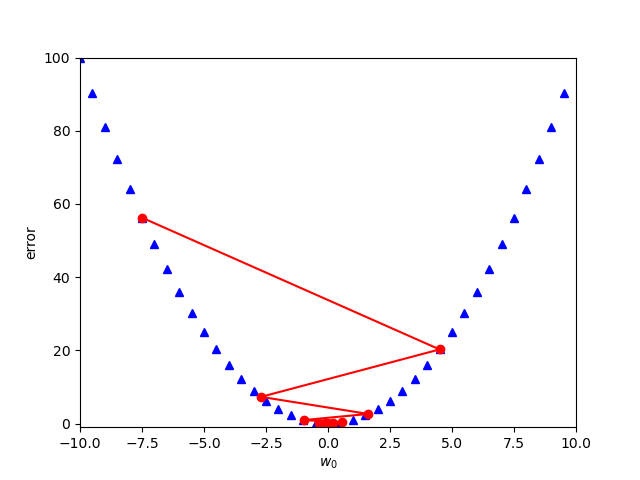

In [64]:
fig, ax = plt.subplots()

w0_range = np.arange(-10, 10, 0.5)
error = parabola(np.arange(-10, 10, 0.5))
ax.plot(w0_range, error,'b^')

w_0_vals = [-7.5]
error_vals = [parabola(w_0_vals[0])]
for i in range(20):
    
    w0_range = np.arange(w_0_vals[-1]-0.5, w_0_vals[-1]+0.6, 0.5)
    error = parabola(w0_range)
    slope = (error[-1]-error[0]) / (w0_range[-1]-w0_range[0])

    w_0_new = w_0_vals[-1] - slope * 0.8
    w_0_vals.append(w_0_new)
    error_vals.append(parabola(w_0_new))

ax.plot(w_0_vals, error_vals, 'ro-');

ax.set(xlim=[-10,10], ylim=[-1,100], xlabel='$w_0$', ylabel='error');

We see that we finally still converge to the solution, but we hop from one side to the other of the error plot. In case we had a local minimum because we loop at a simple parabola, but for more complex landscape we might never find the minimum. For example with the function used before with local minima we could get something not converging:

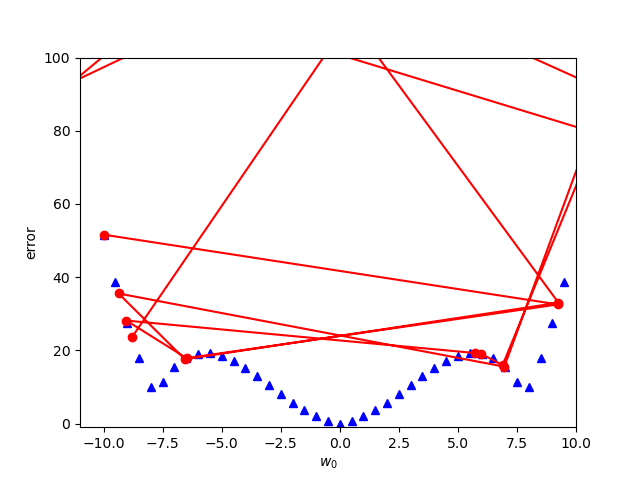

In [65]:
def error_fun(x):
    return x**2 * np.abs(np.cos(4*x/20)) + np.abs(x)/1

fig, ax = plt.subplots()

w0_range = np.arange(-10, 10, 0.5)
error = error_fun(np.arange(-10, 10, 0.5))
ax.plot(w0_range, error,'b^')

w_0_vals = [-10.]
error_vals = [error_fun(w_0_vals[0])]
for i in range(20):
    
    w0_range = np.arange(w_0_vals[-1]-0.5, w_0_vals[-1]+0.6, 0.5)
    error = error_fun(w0_range)
    slope = (error[-1]-error[0]) / (w0_range[-1]-w0_range[0])

    w_0_new = w_0_vals[-1] - slope * 0.7
    w_0_vals.append(w_0_new)
    error_vals.append(error_fun(w_0_new))

ax.plot(w_0_vals, error_vals, 'ro-');

ax.set(xlim=[-11,10], ylim=[-1,100], xlabel='$w_0$', ylabel='error');

## Considerations

We have seen only a tiny fraction of existing linear regression methods. However these simple examples have allowed us to learn fundamental concepts:
- metrics: how do we measure the quality of our model. In this case we used the sum of squared errors
- gradient descent: using the local slope to find the minimum in the error and therefore the best parameters
- potential pitfalls like vanishing gradients (no slope), learning rate etc.

Note that all these concept will reappear in other methods, in particular in the most advanced ones like Deep Learning.

## Exercise

1. Import the dataset at this address: https://raw.githubusercontent.com/guiwitz/EHML/main/datasets/kc_house_data.csv. This dataset contains information about houses sold in Kings County (California) such as price, surface etc.

2. Using seaborn, plot the relation between ```sqft_living``` and ```price```.

3. Using scikit learn's ```LinearRegressor``` fit a model to the relation between ```sqft_living``` and ```price```.

4. Plot the resulting model on top of the data 

5. Redo the exercise but now use the Stochastic Gradient Descent version of the linear regressor.

6. For 4. or 5. try to compute the error between the actual price and the price predicted by the model and plot it.
